In [297]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import optimize
from scipy.stats import multivariate_normal
import pandas as pd
import os
from math import *

In [298]:
#Manual svd function written from scratch
def svd_man(A):
    C_m=A @ A.transpose()
    lam_m,q_m=np.linalg.eig(C_m)
    idx = lam_m.argsort()[::-1]         #Eigen Values and corresponding eigen vectors are sorted in descending order
    lam_m = lam_m[idx]
    q_m = q_m[:,idx]
    C_n=A.transpose() @ A
    lam_n,q_n=np.linalg.eig(C_n)
    idx = lam_n.argsort()[::-1]         #Eigen Values and corresponding eigen vectors are sorted in descending order
    lam_n = lam_n[idx]
    q_n = q_n[:,idx]
    p=q_m
    if lam_m.size<=lam_n.size:
        s=np.sqrt(lam_m) 
    else:
        s=lam_n
    q=q_n.transpose()
    return p,s,q
#vineBeta function to generate highly correlated correlation matrix
def vineBeta(d,betaparam):               #50,20,10,5,2,1 - values of betaparameter for decreasing correlation
    P=np.zeros((d,d))
    S=np.eye(d)
    for k in range(d-1):
        for i in range(k+1,d):
            P[k,i]=np.random.beta(betaparam,betaparam)
            P[k,i]=2*(P[k,i]-0.5)
            p=P[k,i]
            for l in range(k-1,-1,-1):
                p=p*sqrt((1-(P[l,i])**2)*(1-(P[l,k])**2))+P[l,i]*P[l,k]
            S[k,i]=p
            S[i,k]=p
    idx=np.random.permutation(d)
    S=S[idx,:]
    S=S[:,idx]
    return S
def highly_correlated_random_matrix(x,betaparam):
    r=vineBeta(x.shape[1],betaparam)                     # Assuming columns represents dimensions
    c=np.linalg.cholesky(r)
    y=c @ x
    return y
def Forb_norm(s):
    return sqrt(s @ s)
def Forb_norm_mat(A):
    return sqrt(sum(sum(A**2)))

In [299]:
#Random uniform 100x100 matrix(statistically independent)
x=np.random.random((100,100))

In [300]:
betaparam=50 #For high correlation
A=highly_correlated_random_matrix(x,betaparam)#Highly correlated random matrix from statistically independent matrix
#A=x #Uncomment it for (f-statistically independent case) part

In [301]:
#Question1
f_a=Forb_norm_mat(A)
f_a

55.80878453735402

In [308]:
# A=p*diag(s)*q
p,s,q=svd_man(A)

100

In [303]:
#Vary t to get the fraction captured by top t values. t=1 gives fraction captured by top most sigular vector
t=10
A_t10=p[:,0:t] @ np.diag(s[0:t]) @ q[0:t,:]
f_a_t10=Forb_norm_mat(A_t10)
fraction_t10=f_a_t10/f_a
fraction_t10

0.9175671633886789

In [304]:
#Fraction captured by random 10 values
idx_r10=np.random.choice(range(s.size),size=10)
A_r10=p[:,idx_r10] @ np.diag(s[idx_r10]) @ q[idx_r10,:]
fraction_r10=Forb_norm_mat(A_r10)/f_a
fraction_r10

0.1872305737733886

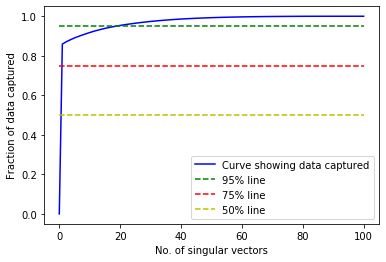

In [309]:
#Change t_s to zoom out in graph like t_s=5 will show that only one singular vector will enough to cappture 85% data.
#Simillarly t_s=20 and t_s=25 will change the graph accordingly
t_s=s.size  # s.size=100
fraction=[]
n_s=range(0,t_s+1)
for i in n_s:
    A_i=p[:,0:i] @ np.diag(s[0:i]) @ q[0:i,:]
    fraction_i=Forb_norm_mat(A_i)/f_a
    fraction.append(fraction_i)
plt.plot(n_s,fraction,'b-',n_s,0.95*np.ones(len(n_s)),'g--',0.75*np.ones(len(n_s)),'r--',0.50*np.ones(len(n_s)),'y--')
plt.xlabel('No. of singular vectors')
plt.ylabel('Fraction of data captured')
plt.legend(('Curve showing data captured','95% line','75% line','50% line'))